# Gas Sensor Array Drift Dataset at Different Concentrations



*   Defined a list of gas types, representing different types of gases.


*  Created a function process_data to read and process data from a file.

*   Opened each file, read it line by line, and extracted relevant information such as gas label, concentration, and features.

*   Converted gas labels to corresponding names using the predefined list of gas types.

*   Created a dictionary for each entry in the file, including 'Batch ID,' 'gas_label,' 'concentration,' and 'feature_' columns.
*  Appended each dictionary to a list (data_list).
*  Converted the list of dictionaries into a Pandas DataFrame (df).
*   Used the glob module to get a list of all ".dat" files in a specified directory (path).
*   Processed the first 10 files, or fewer if fewer than 10 files are available.
*   Iterated over each file, processed the data using the process_data function, and concatenated the resulting DataFrames into a single DataFrame (df_all).
*  Sorted the DataFrame by 'gas_label' and reset the index.


In [3]:
import pandas as pd
import glob
import os

# Define the gas types
gas_types = ['Ethanol', 'Ethylene', 'Ammonia', 'Acetaldehyde', 'Acetone', 'Toluene']

def process_data(file_path, gas_types, batch_id):
    # Initialize an empty list to store the processed data
    data_list = []

    # Open and read the file line by line
    with open(file_path, 'r') as file:
        for line in file:
            # Splitting the line at the first semicolon
            gas_label, rest = line.strip().split(';')

            # Convert gas_label to corresponding name
            gas_label_name = gas_types[int(gas_label) - 1]

            # Extract concentration
            concentration, features = rest.split(' ', 1)

            # Create a dictionary for the entry
            entry_dict = {'Batch ID': batch_id, 'gas_label': gas_label_name, 'concentration': float(concentration)}

            # Splitting the features and adding them to the dictionary
            for feature in features.split():
                index, value = feature.split(':')
                entry_dict[f'feature_{index}'] = float(value)

            # Add the dictionary to the data list
            data_list.append(entry_dict)

    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(data_list)

    return df

# Use your path
path = r"C:\Users\Yogesh\Desktop\Term Project\gas+sensor+array+drift+dataset+at+different+concentrations"

# Grab all .dat files in the input folder
all_files = glob.glob(os.path.join(path, "*.dat"))

# Ensure only the first 10 files are processed
all_files = all_files[:10]

# Initialize an empty DataFrame to store all batches
df_all = pd.DataFrame()

# Process each .dat file
for i in range(10):  # Use range(10) to iterate over the first 10 files
    file = all_files[i]
    df_batch = process_data(file, gas_types, batch_id=i+1)
    df_all = pd.concat([df_all, df_batch], ignore_index=True)

# Move 'Batch ID' column to the first position
df_all = df_all[['Batch ID'] + [col for col in df_all.columns if col != 'Batch ID']]

# Sort by gas_label and reindex
df_all.sort_values(by=['gas_label'], inplace=True)
df_all.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df_all.head())



   Batch ID     gas_label  concentration   feature_1  feature_2  feature_3  \
0         8  Acetaldehyde           30.0  12714.6680   2.126732   2.778869   
1         8  Acetaldehyde          100.0  13124.5372   4.428956   2.751767   
2         2  Acetaldehyde           50.0   4108.0312   1.333074   0.829559   
3         8  Acetaldehyde          160.0  16628.4727   4.613198   3.810110   
4         8  Acetaldehyde          140.0   2200.3432   1.623948   3.542865   

   feature_4  feature_5  feature_6  feature_7  ...  feature_119  feature_120  \
0   4.366970  10.349759  -2.423530  -3.698281  ...    -7.367909   -14.910881   
1   3.913745   7.155696  -1.918129  -2.801819  ...    -6.589560   -14.889079   
2   1.388662   5.364651  -2.067825  -2.985018  ...    -1.595453    -4.341344   
3   5.434378   9.842276  -2.391345  -3.433294  ...   -10.068741   -18.506467   
4   4.926199   8.524922  -1.817719  -5.283235  ...    -8.718727   -18.497095   

   feature_121  feature_122  feature_123  feature_

The pivot table  is used to organizes and summarizes the concentration data.it is easier to analyze and compare gas concentrations across different batches and gas types.

In [4]:
# Create a pivot table
pivot_table_result = df_all.pivot_table(index='Batch ID', columns='gas_label', values='concentration', fill_value=0)

# Display the pivoted result
print(pivot_table_result)

gas_label  Acetaldehyde     Acetone     Ammonia     Ethanol    Ethylene  \
Batch ID                                                                  
1            135.000000  226.428571  498.795181  127.222222  127.040816   
2            126.666667  508.333333  508.333333  126.166667  126.666667   
3            147.247706  192.293233  300.000000  162.408537  150.164671   
4            137.500000  172.000000  199.884259  138.219178  136.683673   
5            160.000000  250.000000  250.000000  180.468750  100.000000   
6            217.391304  202.380952  250.000000  185.714286  137.500000   
7            184.482759  121.534653  241.818182   66.439689   69.512195   
8            113.497984  172.888889  167.743056  121.421418  126.272659   
9            101.818182   78.216783  110.500000   10.000000   10.000000   
10           100.000000  100.000000  119.600000   10.000000   10.000000   

gas_label    Toluene  
Batch ID              
1          39.594595  
2          50.166667  
3      


*  Apply PCA with two components to reduce the dimensionality of the data.
Added the two PCA components ('PCA1' and 'PCA2') to the DataFrame.

*   Plotted bar graphs for each batch using Seaborn and Matplotlib, showing concentrations of different gases.



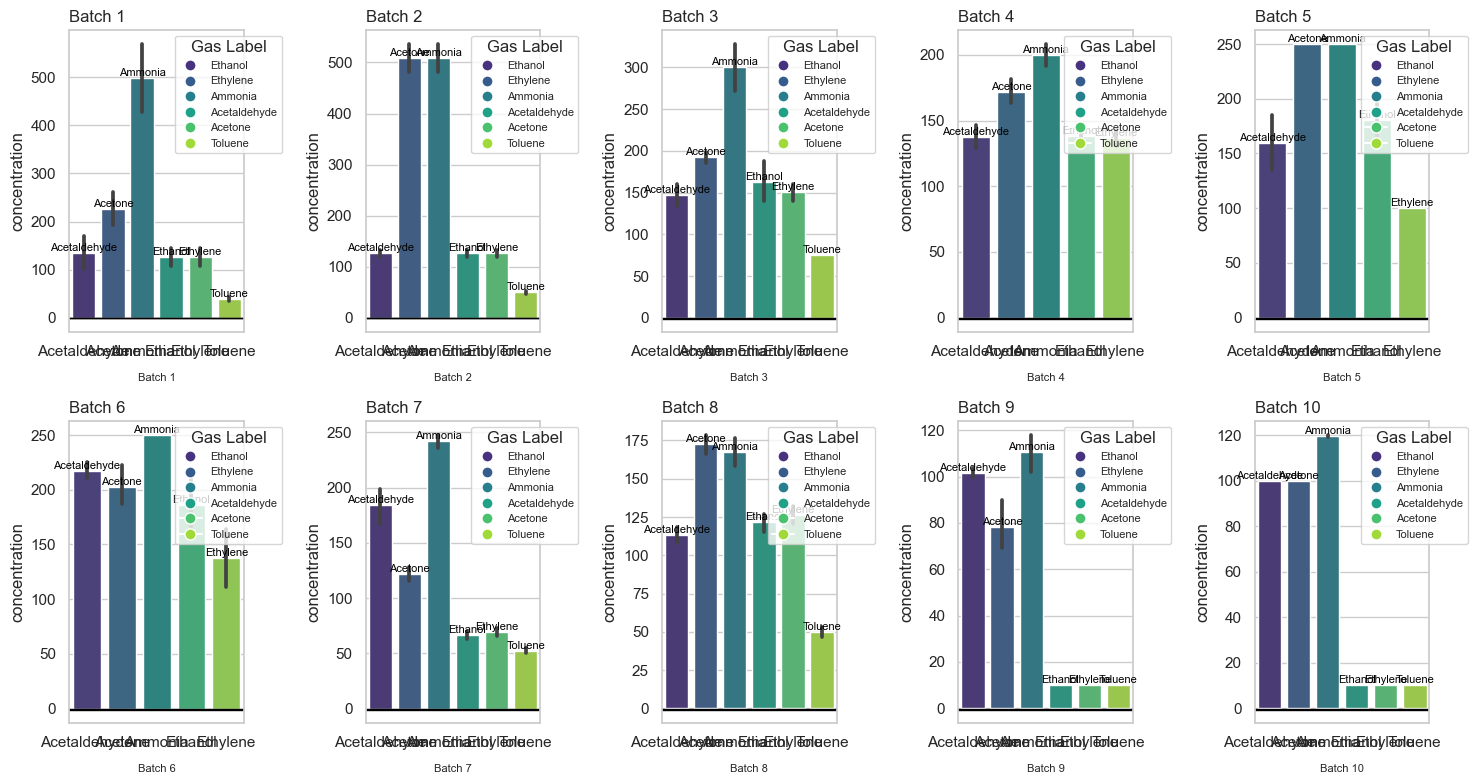

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA  

# Extract features for PCA
features = df_all.columns[3:]

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_all[features])

# Add PCA components to the DataFrame
df_all['PCA1'] = pca_result[:, 0]
df_all['PCA2'] = pca_result[:, 1]

# Plot bar graphs for each batch with different colors for gases
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

for batch_id in range(1, 11):
    plt.subplot(2, 5, batch_id)
    batch_data = df_all[df_all['Batch ID'] == batch_id]
    
    # Plot bar graph with color codes on bars
    ax = sns.barplot(x='gas_label', y='concentration', data=batch_data, palette='viridis')
    
    # Add title, lines below the title, and batch number at the bottom
    plt.title(f'Batch {batch_id}', loc='left', fontsize=12)
    ax.axhline(y=-0.5, color='black', linestyle='-', linewidth=1)
    ax.axhline(y=-1.0, color='black', linestyle='-', linewidth=1)
    
    # Add batch number at the bottom
    plt.xlabel(f'Batch {batch_id}', fontsize=8, labelpad=10)
    
    # Add color codes on the bars
    for p, gas_label in zip(ax.patches, batch_data['gas_label'].unique()):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, gas_label, ha="center", va="bottom", fontsize=8, color='black')
    
    # Add legend within the plot
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                         markerfacecolor=color, markersize=8) for label, color in zip(gas_types, sns.color_palette('viridis'))]
    ax.legend(handles=handles, title='Gas Label', loc='upper right', bbox_to_anchor=(1.25, 1), prop={'size': 8})
plt.tight_layout()
plt.show()

* The below visualization helps to compare the concentration distributions of different gases.

* Gas Concentration Distributions: Each gas has box plot representing its concentration distribution.
The box plot provides information about the median, quartiles, and potential outliers in the data.


* Observations:

Acetaldehyde has the lowest median concentration.
Ammonia has the highest median concentration and also shows an outlier at around 900.
Toluene ,box plot shows significant amount of outliers above its upper whisker, indicating variations in its concentrations.

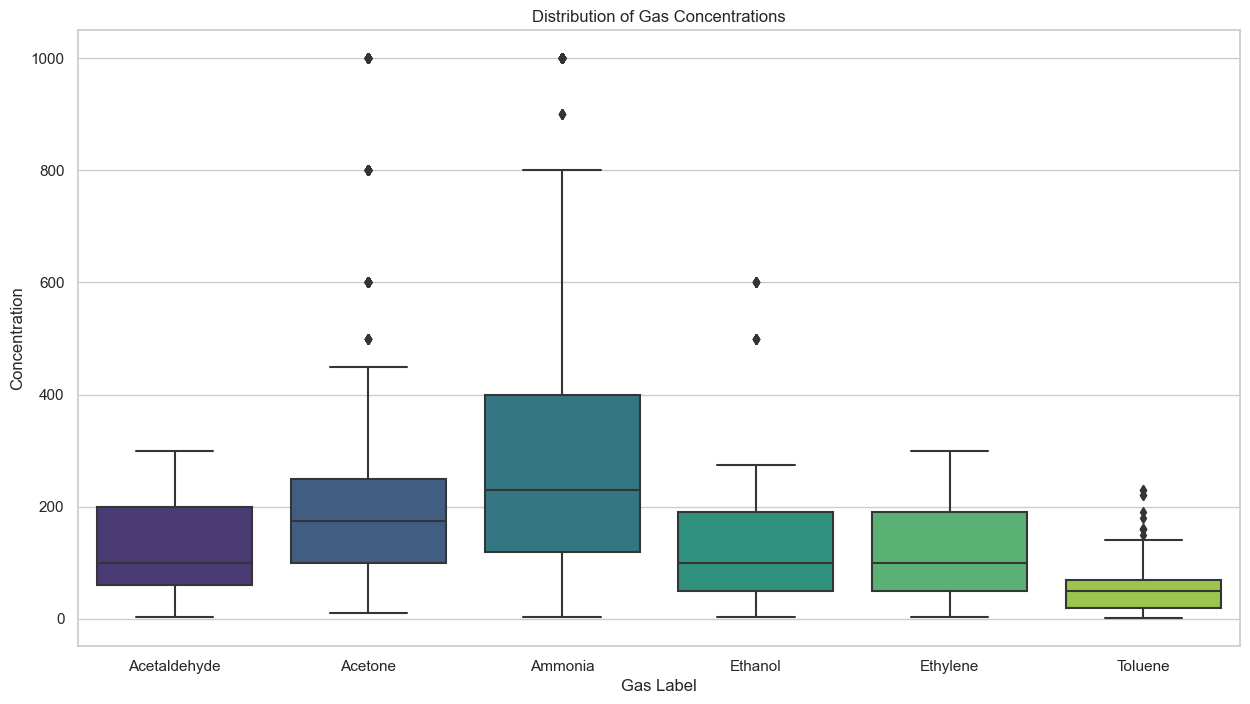

In [6]:
# Improve - Box plots for  visualization
plt.figure(figsize=(15, 8))
sns.boxplot(x='gas_label', y='concentration', data=df_all, palette='viridis')
plt.title('Distribution of Gas Concentrations')
plt.xlabel('Gas Label')
plt.ylabel('Concentration')
plt.show()


Variation Across Batches: The concentration of these gases varies significantly across different batches. Each batch has a unique gas concentration profile.

* Observations:

Batch 2 has notably high concentrations of Acetaldehyde and Ethanol, reaching close to the maximum value on the y-axis.
Other batches varied concentrations of all six gases, with no other batch reaching as high a concentration as batch 2 for any gas.

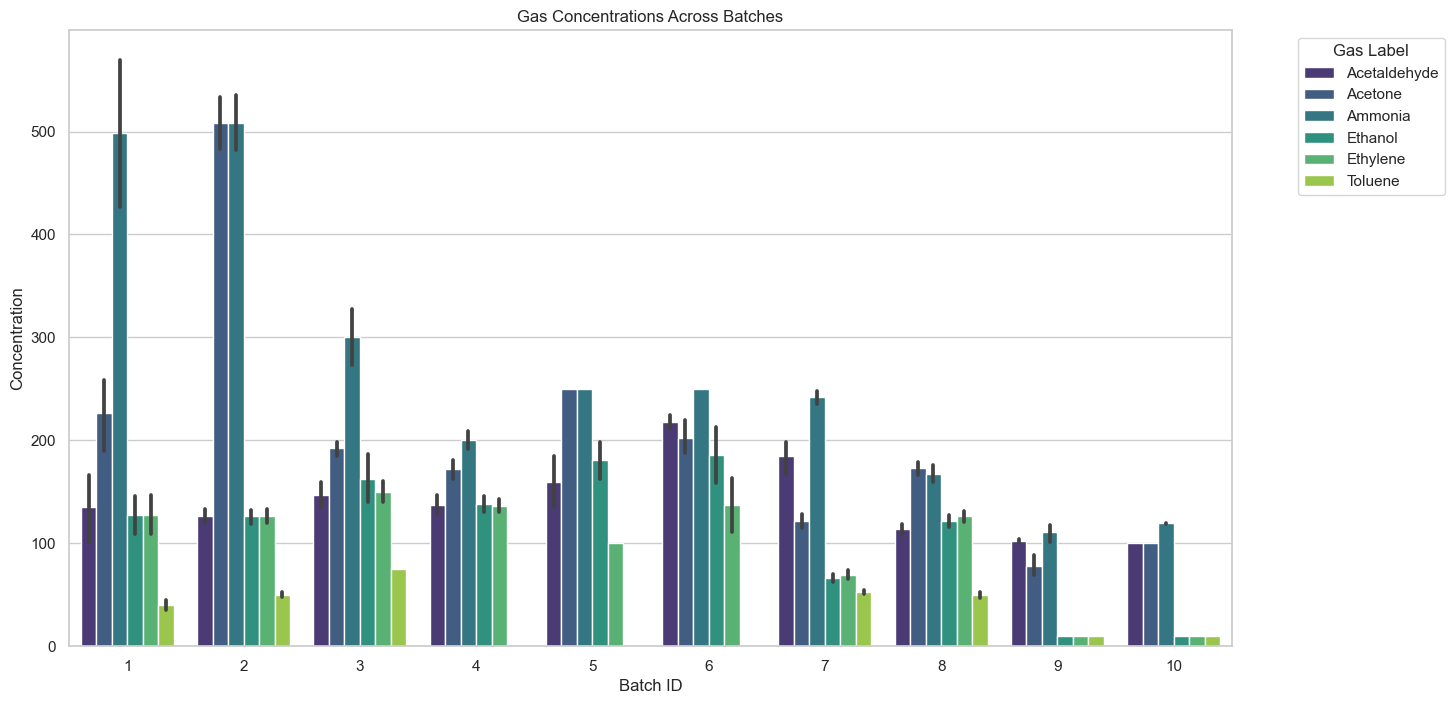

In [7]:
# Start Simple
plt.figure(figsize=(15, 8))
sns.barplot(x='Batch ID', y='concentration', hue='gas_label', data=df_all, palette='viridis')
plt.title('Gas Concentrations Across Batches')
plt.xlabel('Batch ID')
plt.ylabel('Concentration')
plt.legend(title='Gas Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


PCA: The graph is plotted along two axes PCA1 and PCA2, which represent the first and second principal components.

Batch Clusters: Different colors represent different Batch IDs, with ten distinct batches identified. The data points form distinct clusters, suggesting variations or patterns specific to each batch.

Explained Variance: The explained variance for the two principal components is  [0.90091084, 0.6608345]. This indicate the proportion of the dataset variance that lies along each principal component axis.

This graph provides overview of the PCA results.

Explained Variance: [0.90091084 0.06083845]


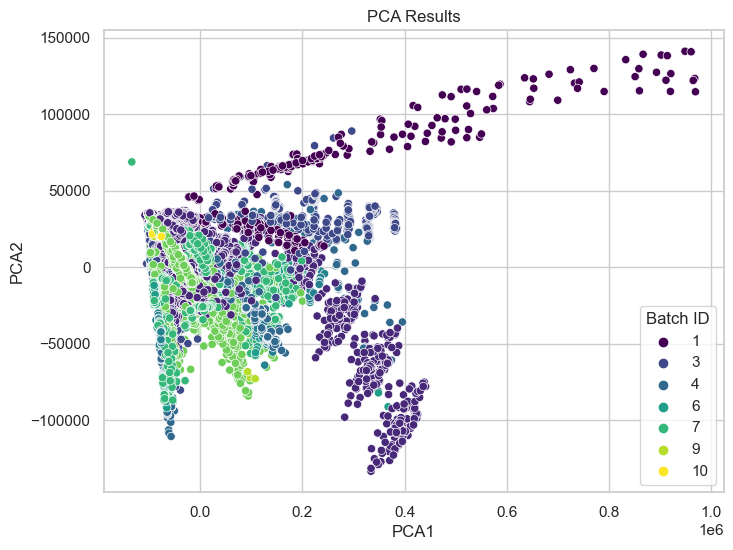

In [8]:
# Calculate the explained variance ratio of the PCA components
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print(f'Explained Variance: {explained_variance}')

# Plot the PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Batch ID', data=df_all, palette='viridis')
plt.title('PCA Results')
plt.show()


why i used K means i need to identify patterns or groupings within a dataset. In this case we used to identify groups of similar data points based on their PCA-transformed features.
from observatio most of the clusters are concentrated towards the left side of the plot except for cluster 3 which is isolated towards the top right.

C:\Users\Yogesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


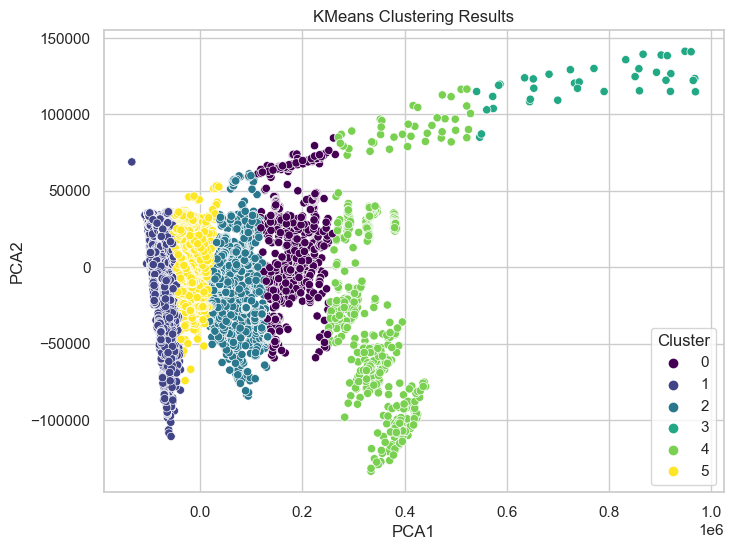

In [9]:
from sklearn.cluster import KMeans

# Define the KMeans model
kmeans = KMeans(n_clusters=6)

# Fit the model to the PCA results
clusters = kmeans.fit_predict(df_all[['PCA1', 'PCA2']])

# Add the cluster labels to the DataFrame
df_all['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_all, palette='viridis')
plt.title('KMeans Clustering Results')
plt.show()

from this we can  understand the overall behavior of the sensor data.
we calculate count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [10]:
import pandas as pd

# Assuming 'sensor_columns' represent the sensor readings in your dataset
sensor_columns = df_all.columns[df_all.columns.str.startswith('feature_')]

sensor_summary = df_all[sensor_columns].describe().transpose()
print(sensor_summary)




               count          mean           std           min          25%  \
feature_1    13910.0  50435.066174  69844.785952 -16757.598600  6694.725950   
feature_2    13910.0      6.638156     13.486391      0.088287     2.284843   
feature_3    13910.0     12.936688     17.610061      0.000100     1.633350   
feature_4    13910.0     18.743953     24.899450      0.000100     2.386836   
feature_5    13910.0     26.890695     38.107685      0.000100     4.967988   
...              ...           ...           ...           ...          ...   
feature_124  13910.0     14.929364     12.437311      0.011488     5.407551   
feature_125  13910.0     19.090980     14.391810      0.118849     8.039227   
feature_126  13910.0     -4.901016      4.195360    -30.205911    -6.789599   
feature_127  13910.0     -8.167792      7.637701    -58.844076   -11.162406   
feature_128  13910.0    -16.089791     20.958479   -410.152297   -18.938690   

                      50%           75%            

Timestamp: ranges from 0 to approximately 14000 indicating the time at which the readings were taken.

Sensor Readings: ranges from 0 to 700000, indicating the range of sensor readings.

Data Representation: Multiple colored lines represent different sets of data showing various peaks and troughs throughout the timeline.

Observations:

There significant peak reaching close to 600000 in sensor reading at around   4000 timestamp.
Other notable peaks are visible at timestamps approximately around 8000, between 10000 and 12000, and just before 14000.
This graph provides overview of the sensor readings over time,The analys is help understand how well the sensor is performing.
High peaks or sudden changes in sensor readings could indicate anomalies or malfunctions in the sensor.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


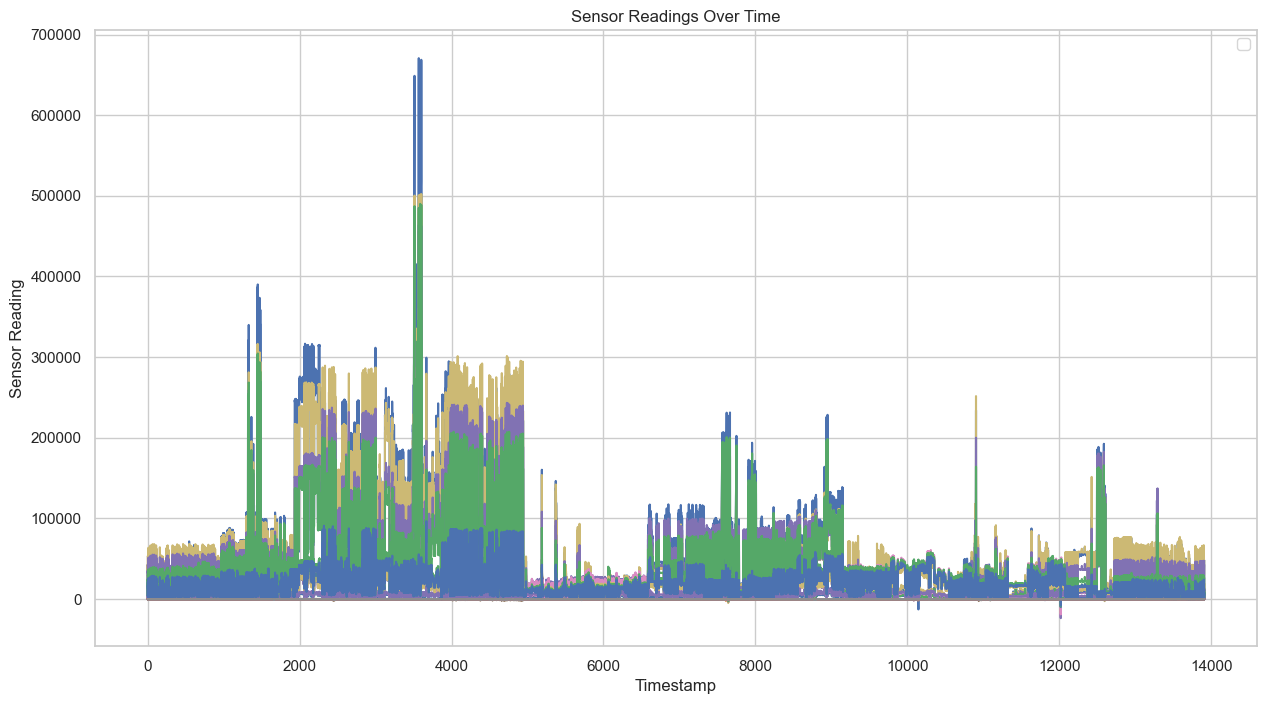

               count          mean           std           min          25%  \
feature_1    13910.0  50435.066174  69844.785952 -16757.598600  6694.725950   
feature_2    13910.0      6.638156     13.486391      0.088287     2.284843   
feature_3    13910.0     12.936688     17.610061      0.000100     1.633350   
feature_4    13910.0     18.743953     24.899450      0.000100     2.386836   
feature_5    13910.0     26.890695     38.107685      0.000100     4.967988   
...              ...           ...           ...           ...          ...   
feature_124  13910.0     14.929364     12.437311      0.011488     5.407551   
feature_125  13910.0     19.090980     14.391810      0.118849     8.039227   
feature_126  13910.0     -4.901016      4.195360    -30.205911    -6.789599   
feature_127  13910.0     -8.167792      7.637701    -58.844076   -11.162406   
feature_128  13910.0    -16.089791     20.958479   -410.152297   -18.938690   

                      50%           75%            

In [11]:
# Time Series Analysis
plt.figure(figsize=(15, 8))
for sensor in sensor_columns:
    plt.plot(df_all.index, df_all[sensor])

plt.title('Sensor Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.legend()
plt.show()

# Sensor-Specific Analysis (Example: Summary Statistics)
sensor_summary = df_all[sensor_columns].describe().transpose()
print(sensor_summary)


why used Isolationforest it has ability to natural handling of outliers, robustness to overfitting, and ease of implementation in identifying potential outliers in gas sensor data.we can used differnt also 

In [12]:
# Outlier Detection using Isolation Forest
from sklearn.ensemble import IsolationForest

X_outlier = df_all[['concentration'] + list(sensor_columns)]
isolation_forest = IsolationForest(contamination=0.05)
outlier_labels = isolation_forest.fit_predict(X_outlier)
outliers = df_all[outlier_labels == -1]
print('Outliers:')
print(outliers)

Outliers:
       Batch ID     gas_label  concentration    feature_1  feature_2  \
1328          1  Acetaldehyde          200.0  321044.6289  17.685935   
1331          1  Acetaldehyde          225.0  339914.8613  18.201967   
1444          1  Acetaldehyde          300.0  386463.0176  19.719521   
1446          1  Acetaldehyde          275.0  370494.3906  19.261399   
1448          1  Acetaldehyde          250.0  350625.7226  18.289720   
...         ...           ...            ...          ...        ...   
12000         7      Ethylene          225.0    6278.0008   3.087393   
12014         7      Ethylene          225.0    6065.5132   3.063735   
12021         7      Ethylene          225.0    6199.7058   3.398094   
12023         7      Ethylene          225.0    6505.0752   3.249869   
12025         7      Ethylene          250.0   15049.9646   5.020038   

        feature_3   feature_4   feature_5  feature_6  feature_7  ...  \
1328    84.004973  111.312897  120.176877 -67.801660 

Scatter Plots: The pattern of dots give you an idea of the correlation between  variables. For example if the dots form  line going from the bottom left to the top right, it suggests a positive correlation.

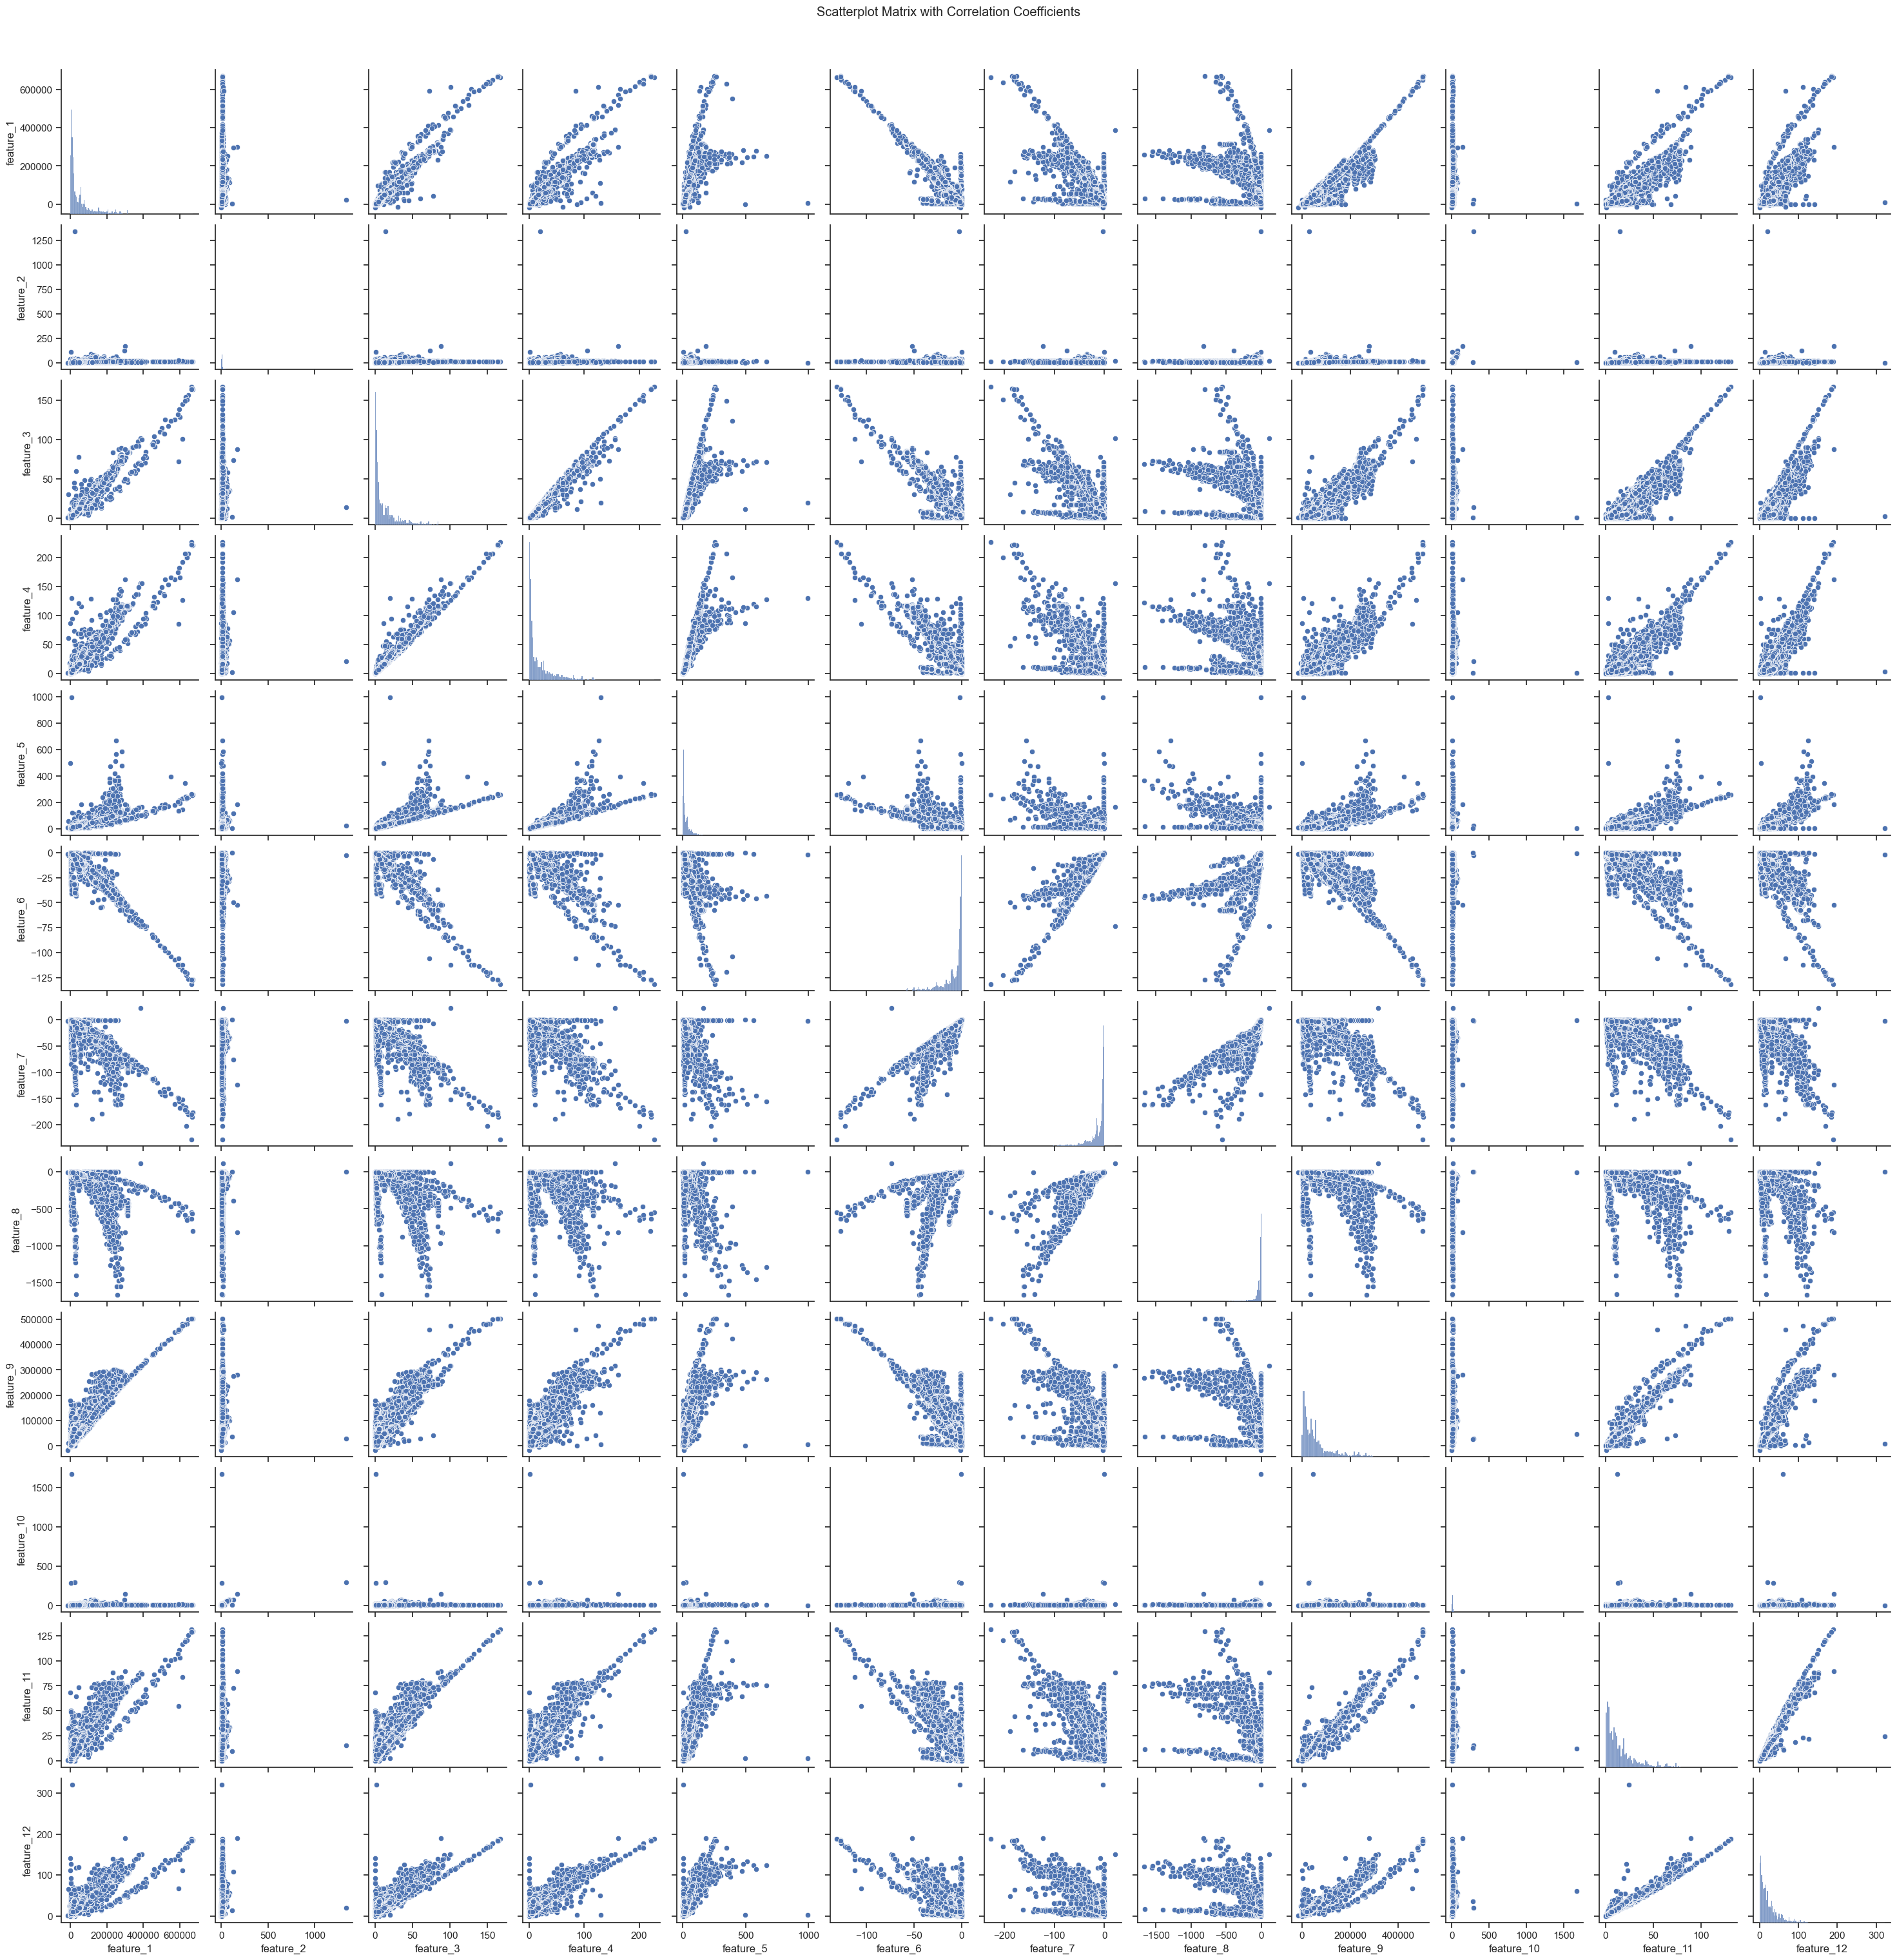

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for better readability (adjust as needed)
subset_features = df_all.columns[3:15]

# Create a scatterplot matrix
sns.set(style="ticks")
sns.pairplot(df_all[subset_features])

# Show correlation coefficients on the plot
plt.suptitle('Scatterplot Matrix with Correlation Coefficients', y=1.02)
plt.show()


Handling Missing Values and Normalizing the Data

In [14]:
from sklearn.preprocessing import StandardScaler

# Handle missing values
df_all.fillna(df_all.mean(), inplace=True)

# Normalize the data
scaler = StandardScaler()
df_all[features] = scaler.fit_transform(df_all[features])


C:\Users\Yogesh\AppData\Local\Temp\ipykernel_17364\1848412757.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_all.fillna(df_all.mean(), inplace=True)


In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Choose features and split the data
# Step 1: Choose features for the model
sensor_columns = [col for col in df_all.columns if 'feature_' in col]
X = df_all[sensor_columns]
y = df_all['concentration']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

# SVM with rbf

In [25]:

# Initial SVM with RBF kernel
svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_initial = svm_rbf.predict(X_test)

rmse_initial = np.sqrt(mean_squared_error(y_test, y_pred_initial))
r2_initial = r2_score(y_test, y_pred_initial)
print(f'Initial Root Mean Squared Error (SVM - RBF): {rmse_initial}')
print(f'Initial R-squared Score (SVM - RBF): {r2_initial}')

# First Iteration: Hyperparameter tuning
param_grid_iteration1 = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5]}
grid_search_iteration1 = GridSearchCV(svm_rbf, param_grid_iteration1, cv=5, scoring='neg_mean_squared_error')
grid_search_iteration1.fit(X_train, y_train)

best_svm_iteration1 = grid_search_iteration1.best_estimator_
y_pred_iteration1 = best_svm_iteration1.predict(X_test)

rmse_iteration1 = np.sqrt(mean_squared_error(y_test, y_pred_iteration1))
r2_iteration1 = r2_score(y_test, y_pred_iteration1)
print(f'Root Mean Squared Error (SVM - RBF, Iteration 1): {rmse_iteration1}')
print(f'R-squared Score (SVM - RBF, Iteration 1): {r2_iteration1}')




Initial Root Mean Squared Error (SVM - RBF): 118.44598568664982
Initial R-squared Score (SVM - RBF): 0.5394769792845364
Root Mean Squared Error (SVM - RBF, Iteration 1): 58.87001463662665
R-squared Score (SVM - RBF, Iteration 1): 0.8862375492325814


In [26]:
# Second Iteration: Hyperparameter tuning
param_grid_iteration2 = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 0.5, 1.0]}
grid_search_iteration2 = GridSearchCV(svm_rbf, param_grid_iteration2, cv=5, scoring='neg_mean_squared_error')
grid_search_iteration2.fit(X_train, y_train)

best_svm_iteration2 = grid_search_iteration2.best_estimator_
y_pred_iteration2 = best_svm_iteration2.predict(X_test)

rmse_iteration2 = np.sqrt(mean_squared_error(y_test, y_pred_iteration2))
r2_iteration2 = r2_score(y_test, y_pred_iteration2)

print(f'Root Mean Squared Error (SVM - RBF, Iteration 2): {rmse_iteration2}')
print(f'R-squared Score (SVM - RBF, Iteration 2): {r2_iteration2}')


Root Mean Squared Error (SVM - RBF, Iteration 2): 30.82527191970471
R-squared Score (SVM - RBF, Iteration 2): 0.9688093457513616


In [28]:
# Third Iteration: Hyperparameter tuning
param_grid_iteration3 = {'C': [0.001, 0.01, 0.1, 1, 10], 'epsilon': [0.0001, 0.001, 0.01, 0.1]}
grid_search_iteration3 = GridSearchCV(svm_rbf, param_grid_iteration3, cv=15, scoring='neg_mean_squared_error')
grid_search_iteration3.fit(X_train, y_train)

best_svm_iteration3 = grid_search_iteration3.best_estimator_
y_pred_iteration3 = best_svm_iteration3.predict(X_test)

rmse_iteration3 = np.sqrt(mean_squared_error(y_test, y_pred_iteration3))
r2_iteration3 = r2_score(y_test, y_pred_iteration3)

print(f'Root Mean Squared Error (SVM - RBF, Iteration 3): {rmse_iteration3}')
print(f'R-squared Score (SVM - RBF, Iteration 3): {r2_iteration3}')



Root Mean Squared Error (SVM - RBF, Iteration 3): 58.87169487541013
R-squared Score (SVM - RBF, Iteration 3): 0.8862310552369236


# Extra -SVM with differnt kernel

In [17]:
# SVM with Linear kernel
svm_linear = SVR(kernel='linear')
param_grid_linear = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5]}
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train, y_train)

best_svm_linear = grid_search_linear.best_estimator_
y_pred_svm_linear = best_svm_linear.predict(X_test)

rmse_svm_linear = np.sqrt(mean_squared_error(y_test, y_pred_svm_linear))
r2_svm_linear = r2_score(y_test, y_pred_svm_linear)
print(f'Root Mean Squared Error (SVM - Linear): {rmse_svm_linear}')
print(f'R-squared Score (SVM - Linear): {r2_svm_linear}')


Root Mean Squared Error (SVM - Linear): 58.573039553337885
R-squared Score (SVM - Linear): 0.8873824240466854


In [18]:

# SVM with Polynomial kernel
svm_poly = SVR(kernel='poly')
param_grid_poly = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5], 'degree': [2, 3, 4]}
grid_search_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5, scoring='neg_mean_squared_error')
grid_search_poly.fit(X_train, y_train)

best_svm_poly = grid_search_poly.best_estimator_
y_pred_svm_poly = best_svm_poly.predict(X_test)

rmse_svm_poly = np.sqrt(mean_squared_error(y_test, y_pred_svm_poly))
r2_svm_poly = r2_score(y_test, y_pred_svm_poly)
print(f'Root Mean Squared Error (SVM - Polynomial): {rmse_svm_poly}')
print(f'R-squared Score (SVM - Polynomial): {r2_svm_poly}')

Root Mean Squared Error (SVM - Polynomial): 87.54269572968535
R-squared Score (SVM - Polynomial): 0.7484348461796332


In [19]:
# SVM with Sigmoid kernel
svm_sigmoid = SVR(kernel='sigmoid')
param_grid_sigmoid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5]}
grid_search_sigmoid = GridSearchCV(svm_sigmoid, param_grid_sigmoid, cv=5, scoring='neg_mean_squared_error')
grid_search_sigmoid.fit(X_train, y_train)

best_svm_sigmoid = grid_search_sigmoid.best_estimator_
y_pred_svm_sigmoid = best_svm_sigmoid.predict(X_test)

rmse_svm_sigmoid = np.sqrt(mean_squared_error(y_test, y_pred_svm_sigmoid))
r2_svm_sigmoid = r2_score(y_test, y_pred_svm_sigmoid)
print(f'Root Mean Squared Error (SVM - Sigmoid): {rmse_svm_sigmoid}')
print(f'R-squared Score (SVM - Sigmoid): {r2_svm_sigmoid}')


Root Mean Squared Error (SVM - Sigmoid): 144.44116368294263
R-squared Score (SVM - Sigmoid): 0.31515449574751664


In [29]:
#########################################################################

Graphical representaion for SVM with rbf kernel with three iteration

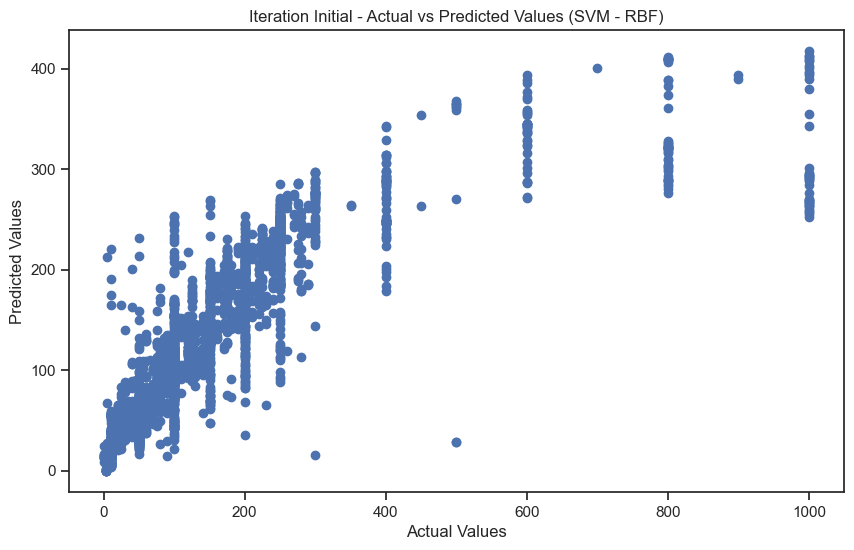

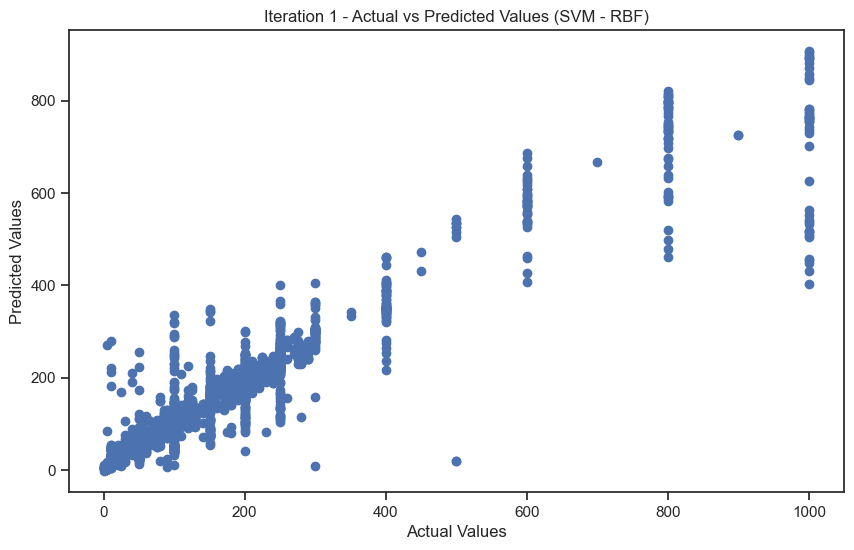

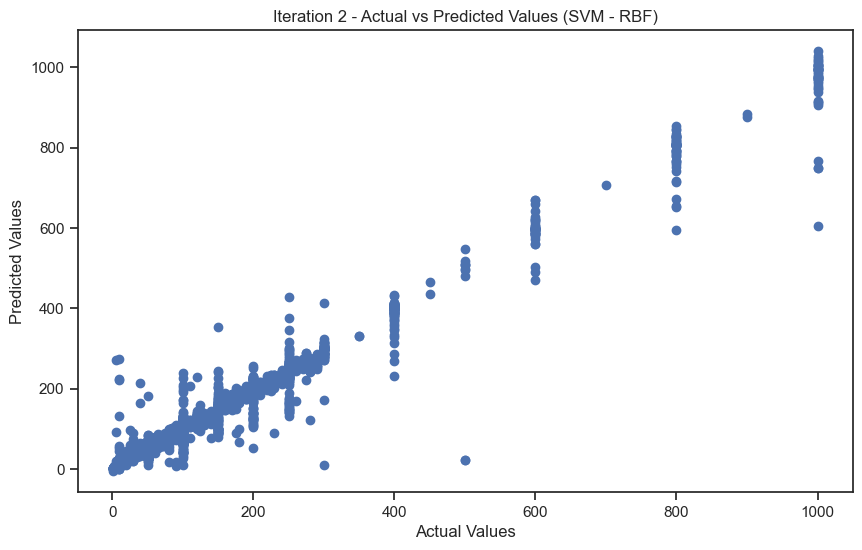

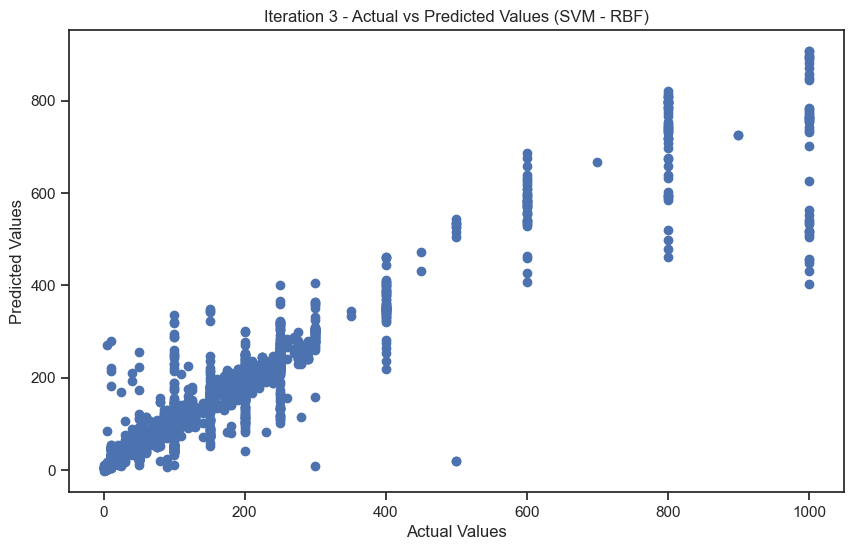

In [33]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(actual, predicted, iteration):
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Iteration {iteration} - Actual vs Predicted Values (SVM - RBF)')
    plt.show()

# Initial Model
plot_actual_vs_predicted(y_test, y_pred_initial, 'Initial')

# Iteration 1
plot_actual_vs_predicted(y_test, y_pred_iteration1, 1)

# Iteration 2
plot_actual_vs_predicted(y_test, y_pred_iteration2, 2)

# Iteration 3
plot_actual_vs_predicted(y_test, y_pred_iteration3, 3)


Fture work

1)Analyze the hyperparameters chosen in the third iteration and identify potential suboptimal choices.

2)Modify the hyperparameter or refined range for parameters like C and epsilon.

3)Explore additional features or modify existing ones to enhance the information captured by the model.

4)Revisit data preprocessing steps,  proper scaling, handling of outliers, and addressing any preprocessing concerns.

5)Experiment with the complexity of the model by trying different kernels, adjusting the model architecture, or exploring alternative machine learning algorithms.

# Second Model

# Decision tree

RMSE (Decision Tree): 32.563843740668034
MAE (Decision Tree): 7.8540070595293985
MSE (Decision Tree): 1060.4039191666448
R-squared (Decision Tree): 0.9651917671084207


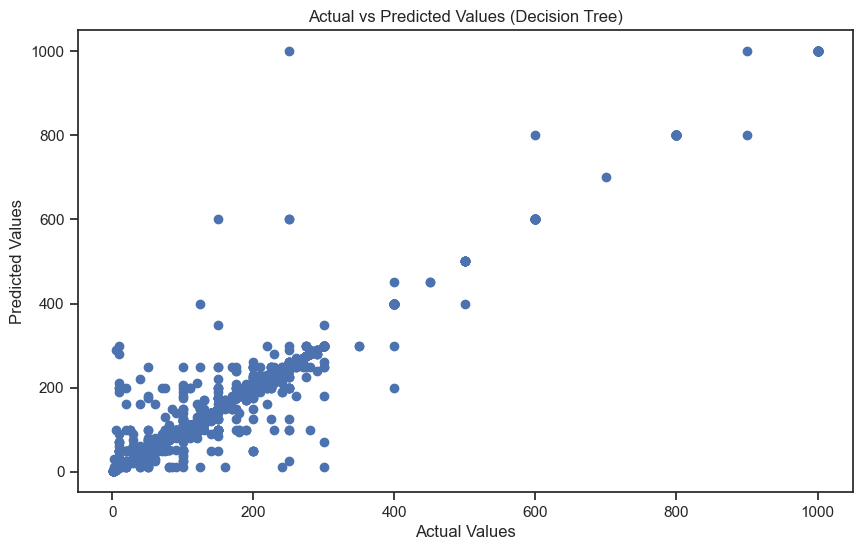

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Choose features for the model
sensor_columns = [col for col in df_all.columns if 'feature_' in col]
X = df_all[sensor_columns]
y = df_all['concentration']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=20, random_state=0)
regressor.fit(X_train, y_train)
predictions_dt = regressor.predict(X_test)

# Step 4: Evaluate the Decision Tree model
rmse_dt = np.sqrt(mean_squared_error(y_test, predictions_dt))
mae_dt = mean_absolute_error(y_test, predictions_dt)
mse_dt = mean_squared_error(y_test, predictions_dt)
r2_dt = r2_score(y_test, predictions_dt)

# Print the metrics
print(f'RMSE (Decision Tree): {rmse_dt}')
print(f'MAE (Decision Tree): {mae_dt}')
print(f'MSE (Decision Tree): {mse_dt}')
print(f'R-squared (Decision Tree): {r2_dt}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_dt)  # Use predictions_dt instead of y_pred
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.show()


Iteration 1 - RMSE (Decision Tree): 36.850775750467996
Iteration 1 - R-squared (Decision Tree): 0.9554237098903987


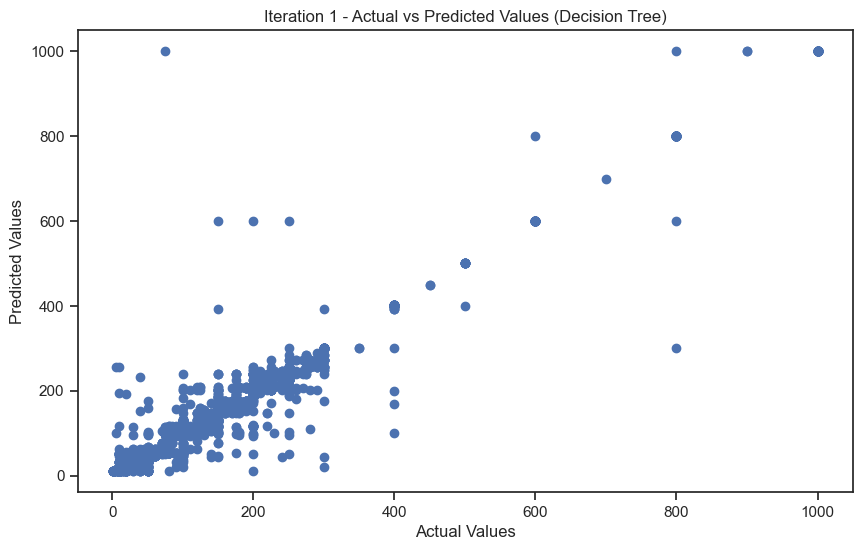

Iteration 2 - RMSE (Decision Tree): 32.563843740668034
Iteration 2 - R-squared (Decision Tree): 0.9651917671084207


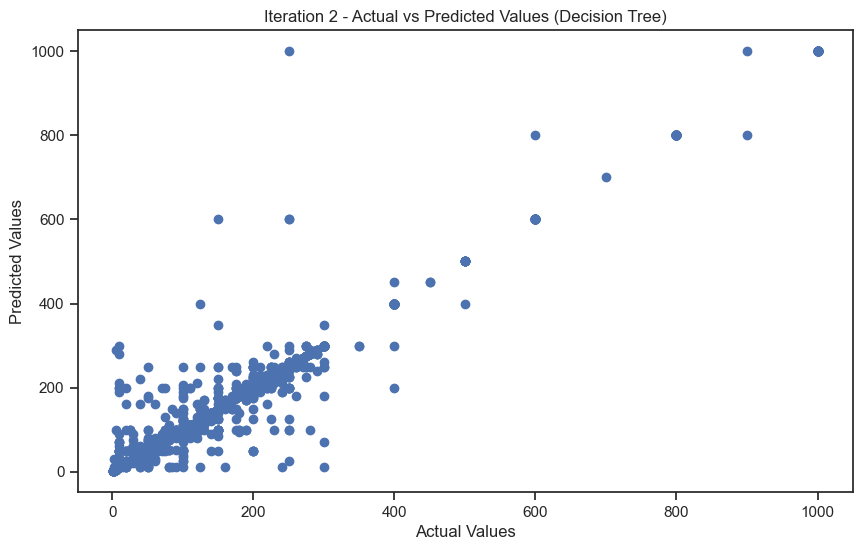

Iteration 3 - RMSE (Decision Tree): 27.287727941853806
Iteration 3 - R-squared (Decision Tree): 0.9755575123245059


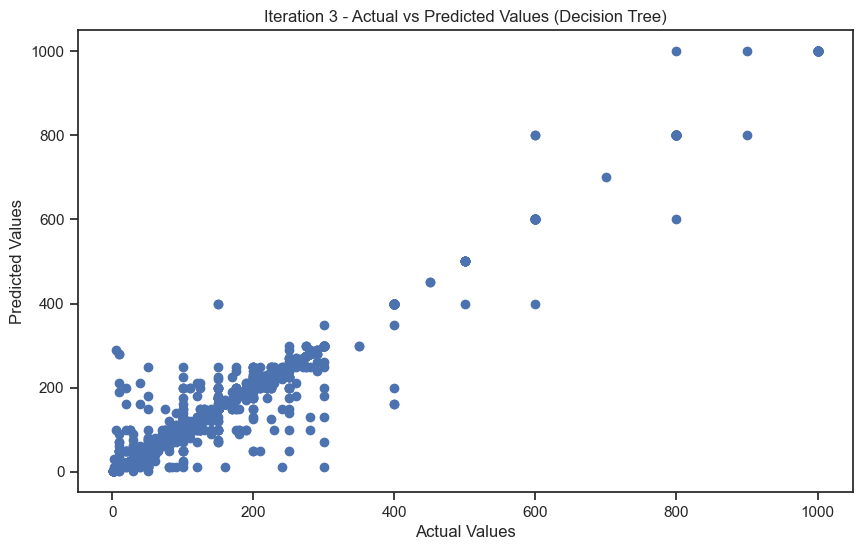

In [32]:
# Example of an iterative process
for iteration in range(1, 4):  # Perform 3 iterations as an example
    # Refine the model or change hyperparameters based on analysis
    regressor = DecisionTreeRegressor(max_depth=iteration * 10, random_state=0)
    regressor.fit(X_train, y_train)
    predictions_dt = regressor.predict(X_test)

    # Evaluate the refined model
    rmse_dt = np.sqrt(mean_squared_error(y_test, predictions_dt))
    r2_dt = r2_score(y_test, predictions_dt)

    # Print the metrics for the refined model
    print(f'Iteration {iteration} - RMSE (Decision Tree): {rmse_dt}')
    print(f'Iteration {iteration} - R-squared (Decision Tree): {r2_dt}')
    
    # Visualize the predicted vs. actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions_dt)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Iteration {iteration} - Actual vs Predicted Values (Decision Tree)')
    plt.show()


# Obseration


•	The scatter plots show predicted vs actual values as iterations progress, points are closer to a line of perfect fit, confirming the numerical improvements.

•	The scatter plots show a strong positive relationship between the actual andpredicted values, and the model’s performance improved with each iteration


#Conclusion-
The Decision Tree model performed better than the SVM with RBF Kernel in all iterations. The Decision Tree model improved with each iteration, showing a decrease in RMSE and an increase in R-squared. This indicates that the Decision Tree model continuously improving. Therefore, the Decision Tree model is the better model
